# Bank marketing campaign 

---

### Step 1: Problem statement and data collection

### Step 2: Exploration and data cleaning
- #### 2.1 Summarize DF
- #### 2.2 Eliminate duplicates
- #### 2.3 Elimnate irrelevant information

### Step 3: Analysis of univariate variables
- #### 3.1 Analysis of categorical variables
- #### 3.2 Analysis of numerical variables

### Step 4: Analysis of multivariate variables
- #### 4.1 Numerical-numerical analysis
- #### 4.2 Categorical-categorical analysis
- #### 4.3 Other mixed analysis
- #### 4.4 From string to numerical transformation --> <i>JSON saving</i>
- #### 4.5 Correlation matrix

### Step 5: Feature engineering
- #### 5.1 Outliers analysis
- #### 5.2 Upper and lower limits of outliers variables --> <i>JSON saving</i>
- #### 5.3 Copy 2 DataFrames: with and without outliers
- #### 5.4 Missing value analysis
- #### 5.5 Inference of new features
- #### 5.6 Feature Scaling
    - ##### 5.6.1 train test
    - ##### 5.6.2 Normalization
    - ##### 5.6.3 Min-Max Scaling

### Step 6: Feature selection
---

Imported Libraries

In [ ]:
# Data processing
# ==================================================================================
import pandas as pd
import numpy as np
import json
from pickle import dump

# Charts
# ==================================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and modeling
# ==================================================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest


# Warnings Configuration
# ==================================================================================
import warnings

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # ignore annoying warning (from sklearn and seaborn)

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
'''NOTE: This affects only the display and not the underlying data, which remains unchanged.'''

## Step 1: Problem statement and data collection

**Analysis Objective**

The objective of conducting an Exploratory Data Analysis (EDA) for the bank marketing campaign dataset is to uncover insights that will improve the effectiveness of future marketing efforts. The focus is on understanding which factors influence a client's decision to subscribe to a long-term deposit and how the campaign strategies could be optimized.



In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")

df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no


<b>Description and types of Data</b>

- `age`--> Age of customer <i>(Numerical)</i>

- `job`--> Type of job <i>(Categorical)</i>
- `marital`--> Marital status <i>(Categorical)</i>
- `education`--> Level of education <i>(Categorical)</i>
- `default`--> Do you currently have credit <i>(Categorical)</i>
- `housing`--> Do you have a housing loan <i>(Categorical)</i>
- `loan`--> Do you have a personal loan? <i>(Categorical)</i>
- `contact`--> Type of contact communication <i>(Categorical)</i>
- `month`--> Last month in which you have been contacted <i>(Categorical)</i>
- `day_of_week`--> Last day on which you have been contacted <i>(Categorical)</i>
- `duration`--> Duration of previous contact in seconds <i>(Numerical)</i>
- `campaign`--> Number of contacts made during this campaign to the customer <i>(Numerical)</i>
- `pdays`--> Number of days that elapsed since the last campaign until the customer was contacted <i>(Numerical)</i>
- `previous`--> Number of contacts made during the previous campaign to the customer <i>(Numerical)</i>
- `poutcome`--> Result of the previous marketing campaign  <i>(Categorical)</i>
- `emp.var.rate`--> Employment variation rate. Quarterly indicator <i>(Numerical)</i>
- `cons.price.idx`--> Consumer price index. Monthly indicator  <i>(Numerical)</i>
- `cons.conf.idx`--> Consumer confidence index. Monthly indicator <i>(Numerical)</i>
- `euribor3m`--> EURIBOR 3-month rate. Daily indicator  <i>(Numerical)</i>
- `nr.employed`--> Number of employees. Quarterly indicator <i>(Numerical)</i>
- `y`. (TARGET)--> Whether the customer takes out a long-term deposit or not <i>(Categorical)</i>

---


## Step 2: Exploration and data cleaning<a name="id2"></a>

### - 2.1 Summarize DF

In [3]:
# Obtain dimensions

rows, columns = df.shape

print(f"The dimensions of this dataset are: {rows} Rows and {columns} Columns")

The dimensions of this dataset are: 41188 Rows and 21 Columns


In [4]:
# Obtain information about data types and non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Check null values

null_var = df.isnull().sum().loc[lambda x: x > 0] # Number of nulls in each variable.

num_of_null_var = len(null_var) # Number of variables with almost 1 null.

print(f"{null_var}\nAnd the number of null variables are {num_of_null_var}")

Series([], dtype: int64)
And the number of null variables are 0


----------<b>Conclusions</b>----------

- There are a total of 41188 rows and 21 columns, among which we find the target or class to predict, `y`.

- The variables always have a value.
- The data has 10 numerical characteristics and 11 categorical characteristics.

---


- ### 2.2 Eliminate duplicates

In [6]:
# Obtain the number of duplicate values in our dataset

num_duplicate_values = df.duplicated().sum()

print(f"The number of duplicate values in the dataset is {num_duplicate_values}")

The number of duplicate values in the dataset is 12


In [7]:
# Dataset copy
filt_df = df.copy()

# Drop the duplicates
if num_duplicate_values:

    filt_df = filt_df.drop_duplicates()

print(filt_df.shape)

filt_df.head(3)


(41176, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no


In [8]:
# Obtain the number of duplicate values in our ¡FILTERED! dataset

num_duplicate_values = filt_df.duplicated().sum()

print(f"The number of duplicate values in the dataset is {num_duplicate_values}")

The number of duplicate values in the dataset is 0


- ### 2.3 Eliminate irrelevant information

    Since our goal is to predict the `y` variable, we should select only the variables that have a meaningful relationship with it and can add value to the predictive process. The variables `pdays`, `age`, `day_of_week`, `housing`, `loan` and `marital` are not useful for the model, likely because they are text-based, identifiers, or contain information that does not directly contribute to price prediction.

In [9]:
# Eliminate irrelevant columns

filt_df.drop(["pdays", "age", "day_of_week", "housing", "loan", "marital"],
                    axis = "columns",
                        inplace = True)

filt_df.head(3)

,job,education,default,contact,month,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,housemaid,basic.4y,no,telephone,may,261,1,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
1,services,high.school,unknown,telephone,may,149,1,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
2,services,high.school,no,telephone,may,226,1,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no


---

## Step 3: Analysis of univariate variables

- ### 3.1 Analysis of categorical variables

In [10]:
categorical_var = []

for column in filt_df: 

    if filt_df[column].dtype == 'object':

        categorical_var.append(column)


print(f"Categorical Variables are:\n{categorical_var}\n\nTotal = {len(categorical_var)}")

Categorical Variables are:
['job', 'education', 'default', 'contact', 'month', 'poutcome', 'y']

Total = 7


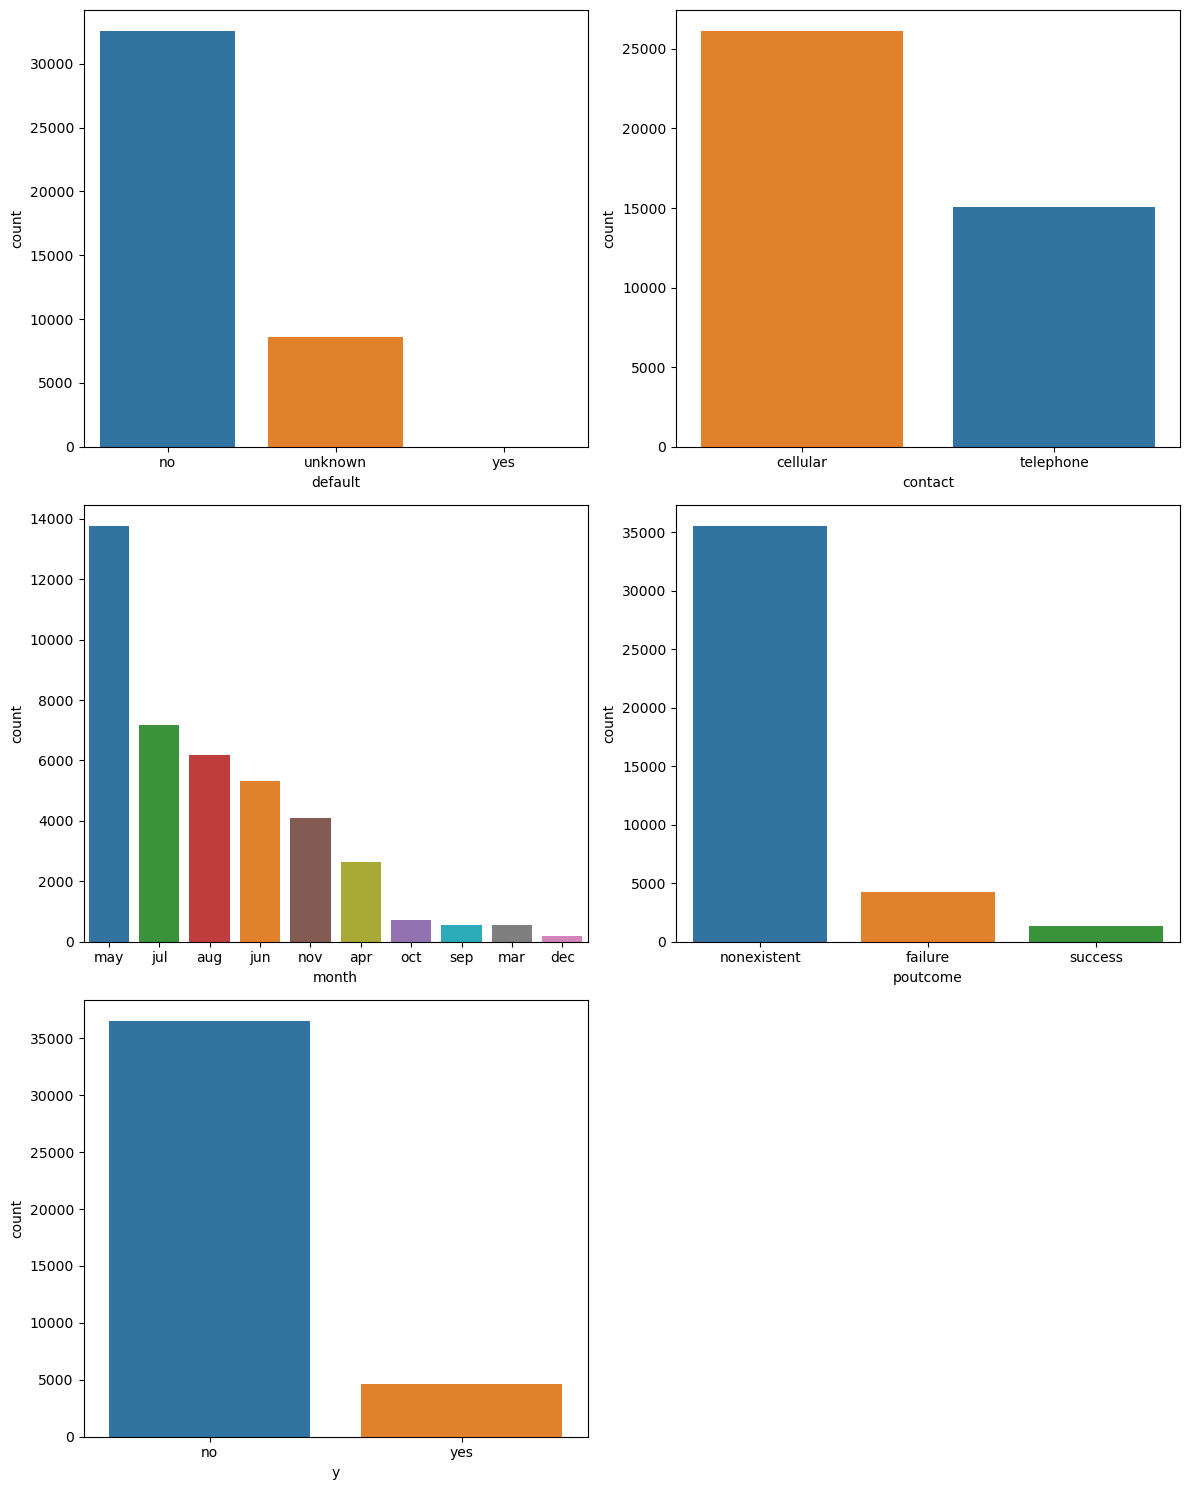

In [11]:
# Frecuency of each category and histogram

fig, axis = plt.subplots(3, 2, figsize = (12, 15))


# Create Histogram (Countplots)


sns.countplot(ax = axis[0, 0], # Variable 'default'
                data = filt_df,
                    x = "default",
                        hue = "default",
                            order = filt_df['default'].sort_values().value_counts().index)



sns.countplot(ax = axis[0, 1], # Variable 'contact'
                data = filt_df,
                    x = "contact",
                        hue = "contact",
                            order = filt_df['contact'].sort_values().value_counts().index)

sns.countplot(ax = axis[1, 0], # Variable 'month'
                data = filt_df, 
                    x = "month",
                        hue = "month",
                            order = filt_df['month'].sort_values().value_counts().index)



sns.countplot(ax = axis[1, 1], # Variable 'poutcome'
                data = filt_df,
                    x = "poutcome",
                        hue = "poutcome",
                            order = filt_df['poutcome'].sort_values().value_counts().index)

sns.countplot(ax = axis[2, 0], # Variable 'y' (target)
                data = filt_df, 
                    x = "y",
                        hue = "y",
                            order = filt_df['y'].sort_values().value_counts().index)

# Remove the empty axes
fig.delaxes(ax = axis[2,1])
# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

----------**Conclusions**----------
- `default`:

    - Observation: The majority of clients do not have a credit default (no category). The unknown status is also quite common, but very few clients have a yes default.
    - Insight: Since most clients do not have a credit default, this variable may have limited variation to influence campaign success. The high occurrence of unknown values may indicate data quality issues or areas where the data collection process could be improved.

- `contact`:

    - Observation: Most clients were contacted via cellular rather than telephone.
    - Insight: This suggests that the bank prefers mobile communication, and it may be beneficial to evaluate if cellular contacts are more effective than telephone in leading to successful outcomes.

- `month`:

    - Observation: There is a strong seasonality in the campaign, with a peak in contacts during May and high activity in July and August. Contacts are minimal in March, December, and September.
    - Insight: The concentration of campaign efforts in specific months indicates a possible seasonal strategy. It could be useful to analyze whether certain months have higher success rates and adjust future campaigns accordingly.

- `previous`:

    - Observation: A large number of clients have a nonexistent outcome from a previous campaign, meaning they were not previously contacted. There are more cases of failure than success.
    - Insight: Clients who were not previously contacted form the majority of the dataset. Analyzing whether previous failures or successes correlate with current campaign success will be key in targeting strategies.

- `y`:

    - Observation: The no category significantly outweighs the yes category, indicating that most clients did not subscribe to a long-term deposit.
    - Insight: The overall success rate of the campaign appears to be low. Understanding the characteristics of the clients who said yes can provide crucial insights into what drives positive outcomes.

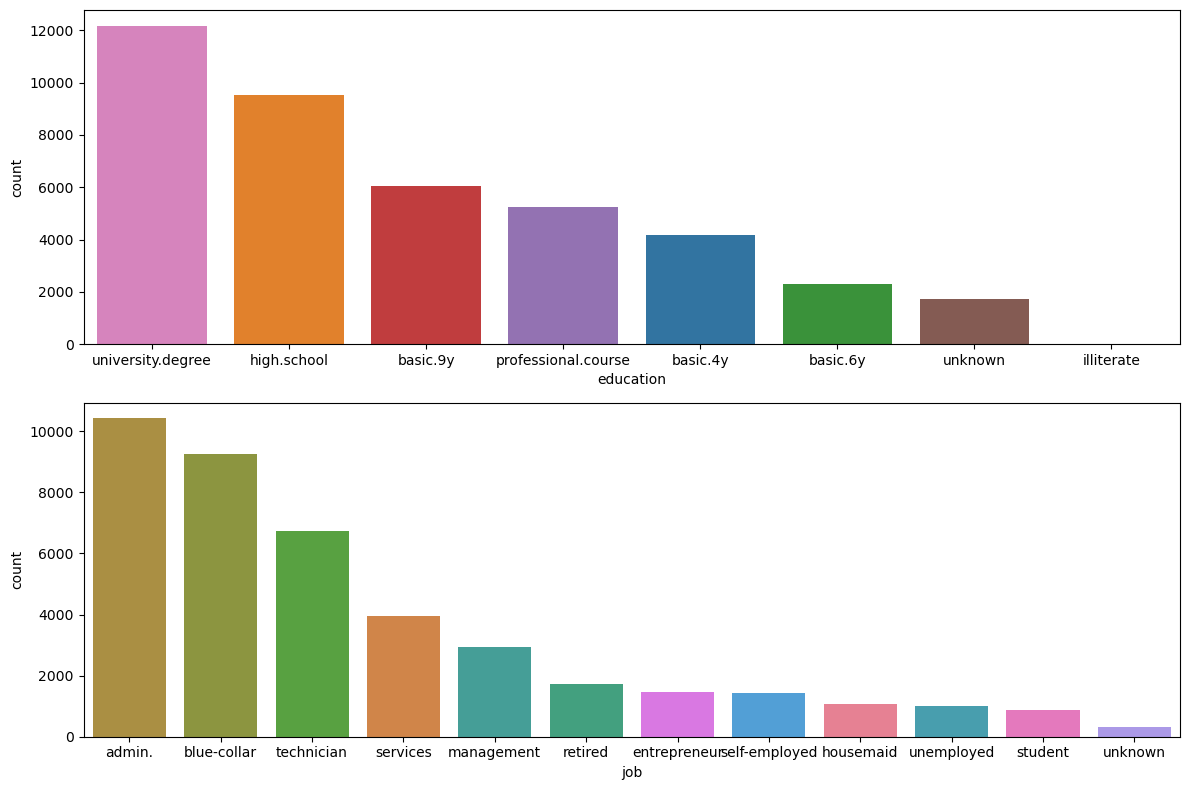

In [12]:
fig, axis = plt.subplots(2, 1, figsize = (12, 8))

sns.countplot(ax = axis[0], # Variable 'education'
                data = filt_df, 
                    x = "education",
                        hue = "education",
                            order = filt_df['education'].sort_values().value_counts().index)


sns.countplot(ax = axis[1], # Variable 'job'
                data = filt_df,
                    x = "job",
                        hue = "job",
                            order = filt_df['job'].sort_values().value_counts().index)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

----------**Conclusions**----------

`education`:
- This chart represents the count of individuals based on their education levels:

    - University Degree has the highest count, indicating most people in this dataset have a university-level education.
    - High School is the next most common level, followed by Basic 9-year education.
    - Professional Course and Basic 4-year have moderate counts.
    - Basic 6-year, Unknown, and Illiterate have the fewest counts, with Illiterate being the least frequent.

`job`:
- This chart represents the count of individuals based on their job categories:

    - Admin and Blue-collar jobs have the highest counts, showing a significant portion of individuals work in these sectors.
    - Technicians also have a considerable count, followed by Services and Management roles.
    - Jobs like Retired, Entrepreneur, Self-employed, Housemaid, Unemployed, Student, and Unknown have lower counts, with Unknown being the least frequent.

---

- ### 3.1 Analysis of numerical variables

In [13]:
# Esto se puede hacer dependiendo de los datos y sabiendo de antemano que todas las variables numéricas son Dtype = 'int' or 'float64'

numerical_var_int = []
numerical_var_float = []

for column in filt_df: 

    if (filt_df[column].dtype == 'int64') :

        numerical_var_int.append(column)

    elif (filt_df[column].dtype == 'float64'):

        numerical_var_float.append(column)

print('============================================')
print(f"Numerical (int) Variables are:\n\n{numerical_var_int}\n\nTotal = {len(numerical_var_int)}")
print('============================================')
print(f"Numerical (float64) Variables are:\n\n{numerical_var_float}\n\nTotal = {len(numerical_var_float)}")
print('============================================')

Numerical (int) Variables are:

['duration', 'campaign', 'previous']

Total = 3
Numerical (float64) Variables are:

['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Total = 5


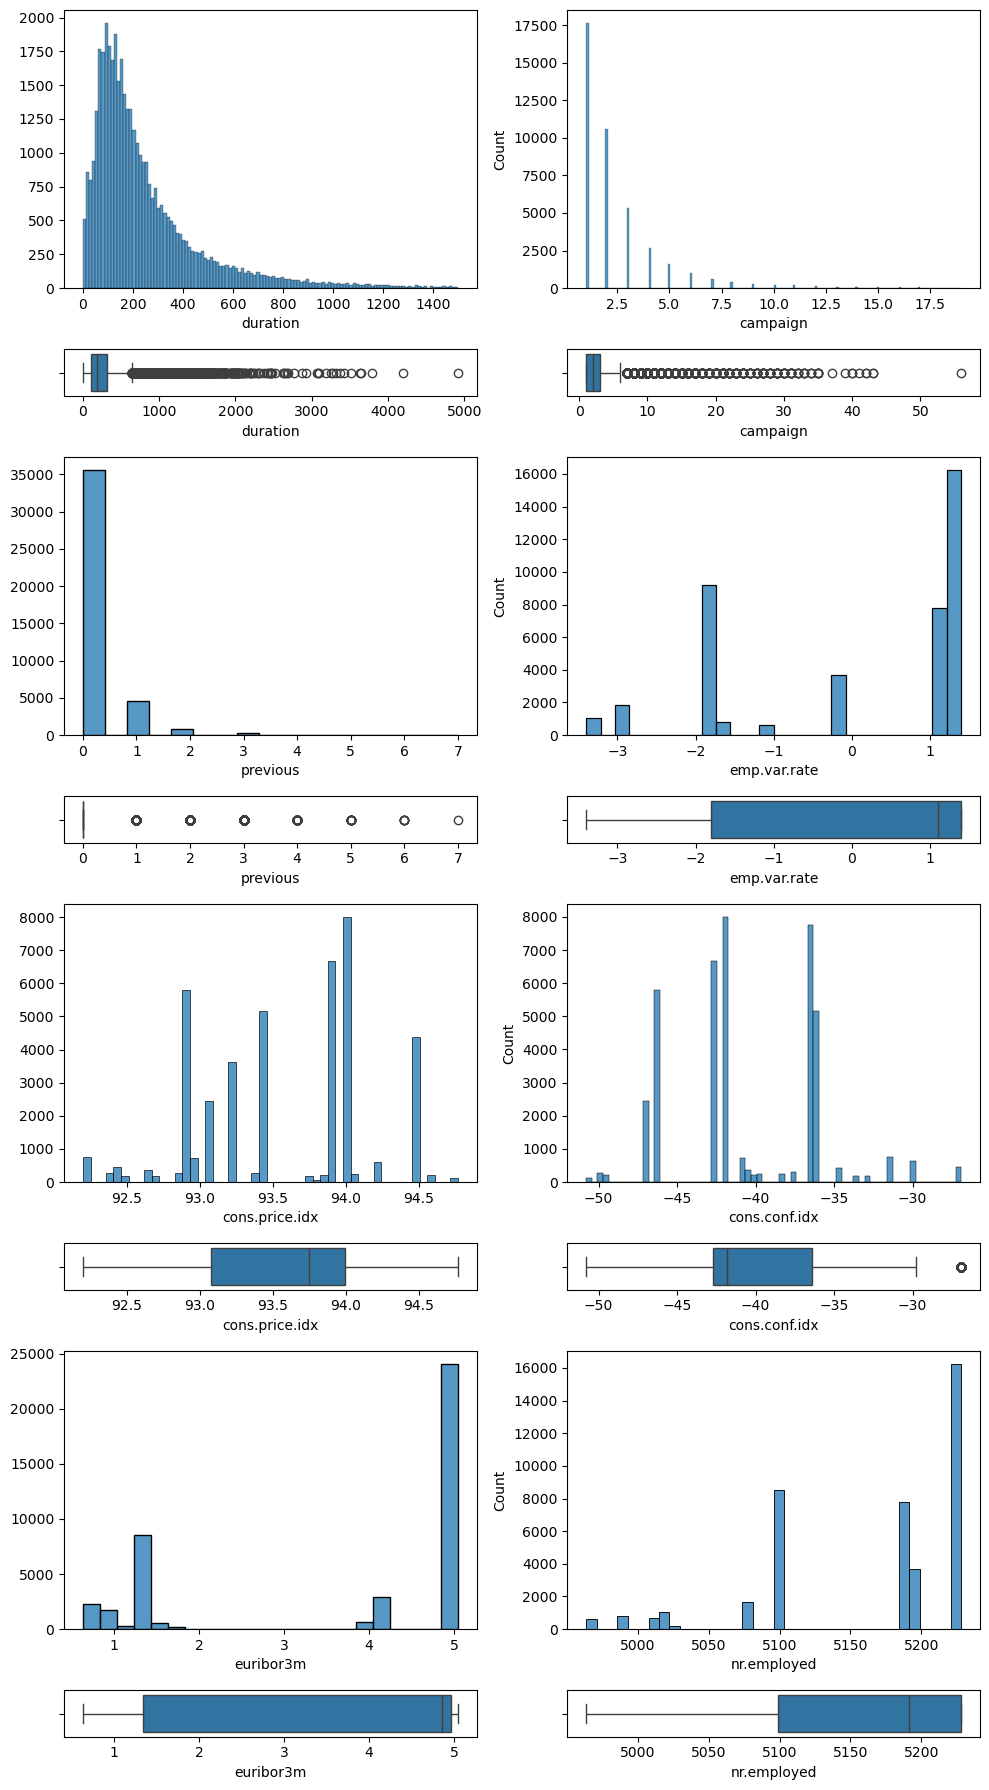

In [14]:
fig, axis = plt.subplots(8, 2,
                            figsize = (10, 18),
                                gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1]})


# ==========================Variable duration==========================
sns.histplot(ax = axis[0, 0],
                data = filt_df[filt_df['duration']<1500], # take values < 1500 because the rest of the values are scattered 
                    x = "duration").set(ylabel = None)

sns.boxplot(ax = axis[1, 0],
                data = filt_df,
                     x = "duration")


# ==========================Variable campaign==========================
sns.histplot(ax = axis[0, 1],
                data = filt_df[filt_df['campaign'] < 20], # take values < 20 because the rest of the values are scattered 
                     x = "campaign")

sns.boxplot(ax = axis[1, 1],
                data = filt_df, 
                     x = "campaign")


# ==========================Variable previous===========================
sns.histplot(ax = axis[2, 0],
                data = filt_df, 
                    x = "previous").set(ylabel = None)

sns.boxplot(ax = axis[3, 0],
                data = filt_df,
                    x = "previous")

#-------------------------flaot64------------------------------------------------------------------

# ==========================Variable emp.var.rate======================== 
sns.histplot(ax = axis[2, 1],
                data = filt_df, 
                    x = "emp.var.rate")

sns.boxplot(ax = axis[3, 1],
                data = filt_df,
                    x = "emp.var.rate")


# ==========================Variable cons.price.idx=======================
sns.histplot(ax = axis[4, 0],
                data = filt_df, # take values < 1500 because the rest of the values are scattered, 
                    x = "cons.price.idx").set(ylabel = None)

sns.boxplot(ax = axis[5, 0],
                data = filt_df,
                     x = "cons.price.idx")


# ==========================Variable cons.conf.idx========================
sns.histplot(ax = axis[4, 1],
                data = filt_df, 
                     x = "cons.conf.idx")

sns.boxplot(ax = axis[5, 1],
                data = filt_df, 
                     x = "cons.conf.idx")


# ==========================Variable euribor3m============================
sns.histplot(ax = axis[6, 0],
                data = filt_df, 
                    x = "euribor3m").set(ylabel = None)

sns.boxplot(ax = axis[7, 0],
                data = filt_df,
                    x = "euribor3m")

# ==========================Variable nr.employed==========================
sns.histplot(ax = axis[6, 1],
                data = filt_df, 
                     x = "nr.employed")

sns.boxplot(ax = axis[7, 1],
                data = filt_df, 
                     x = "nr.employed")


# Remove the empty axes
#fig.delaxes(ax = axis[8,1])
#fig.delaxes(ax = axis[9,1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

----------**Breakdown**----------

1. Duration (`duration`)
    - **Histogram**: The distribution is right-skewed, showing that most calls have a shorter duration.
    - **Box Plot**: There are significant outliers, with most values concentrated at lower durations.

2. Campaign (`campaign`)
    - **Histogram**: Most individuals were contacted only a few times, with a right-skewed distribution.
    - **Box Plot**: A few outliers show a high number of contacts, although these cases are rare.

3. Previous Contacts (`previous`)
    - **Histogram**: Most individuals have zero previous contacts in past campaigns.
    - **Box Plot**: The majority of values are zero, with some outliers at higher contact counts.

4. Employment Variation Rate (`emp.var.rate`)
    - **Histogram**: The distribution shows peaks around certain values, likely representing specific economic conditions.
    - **Box Plot**: Most values range between -3 and 1, with a concentration around positive rates.

5. Consumer Price Index (`cons.price.idx`)
    - **Histogram**: The index shows multiple peaks, indicating variability in consumer prices over time.
    - **Box Plot**: The majority of values lie between approximately 92.5 and 94.5, with a few outliers.

6. Consumer Confidence Index (`cons.conf.idx`)
    - **Histogram**: Values are centered around -40, representing typical confidence index levels.
    - **Box Plot**: Most values fall between -50 and -30, with a few outliers on the lower end.

7. Euribor 3-Month Rate (`euribor3m`)
    - **Histogram**: There is a large concentration of values around 5, with some lower values.
    - **Box Plot**: Most values are tightly concentrated between approximately 1 and 5.

8. Number of Employees (`nr.employed`)
    - **Histogram**: There are two main peaks, suggesting possible economic shifts or periods with different employment levels.
    - **Box Plot**: Values range between approximately 5000 and 5200 employees, showing some variation over time.

---



## Step 4: Analysis of multivariate variables

- ### 4.4 From string to numerical transformation --> JSON saving

    - `Note`: To compare numerical data with categorical data, we need to convert the categorical data into binary format using 'One Hot Encoding'.


In [15]:
# Encoding Variables

def encoding(dataset, variable, json_path):

    factorize = pd.factorize(dataset[variable])

    parsing_dict = {}

    indexes = factorize[1]

    set_factor = list(set(factorize[0]))

    for index in range(len(factorize[1])):
        parsing_dict.update({indexes[index]: int(set_factor[index])})

    with open(json_path, "w") as f:
        json.dump(parsing_dict, f)
        

In [16]:
# Encoding Variable 'job'
encoding(filt_df, "job", "../data/interim/transform_job.json")

# Encoding Variable 'education'
encoding(filt_df, "education", "../data/interim/transform_education.json")

# Encoding Variable 'default'
encoding(filt_df, "default", "../data/interim/transform_default.json")

# Encoding Variable 'contact'
encoding(filt_df, "contact", "../data/interim/transform_contact.json")

# Encoding Variable 'month'
encoding(filt_df, "month", "../data/interim/transform_month.json")

# Encoding Variable 'poutcome'
encoding(filt_df, "poutcome", "../data/interim/transform_poutcome.json")

# Encoding Variable 'y'
encoding(filt_df, "y", "../data/interim/transform_y.json")

---

In [17]:
# Opening Variables

def open_encoded_var(dataset, variable, json_path):

    with open(json_path, "r") as f:
        job_dict = json.load(f)

    dataset[variable] = dataset[variable].apply(lambda x: job_dict.get(x))

In [18]:
# Open Variable 'job'
open_encoded_var(filt_df, "job", "../data/interim/transform_job.json")

# Open Variable 'education'
open_encoded_var(filt_df, "education", "../data/interim/transform_education.json")

# Open Variable 'default'
open_encoded_var(filt_df, "default", "../data/interim/transform_default.json")

# Open Variable 'contact'
open_encoded_var(filt_df, "contact", "../data/interim/transform_contact.json")

# Open Variable 'month'
open_encoded_var(filt_df, "month", "../data/interim/transform_month.json")

# Open Variable 'poutcome'
open_encoded_var(filt_df, "poutcome", "../data/interim/transform_poutcome.json")

# Open Variable 'y'
open_encoded_var(filt_df, "y", "../data/interim/transform_y.json")


- ### 4.5 Correlation matrix (Numerical-Categorical analysis)

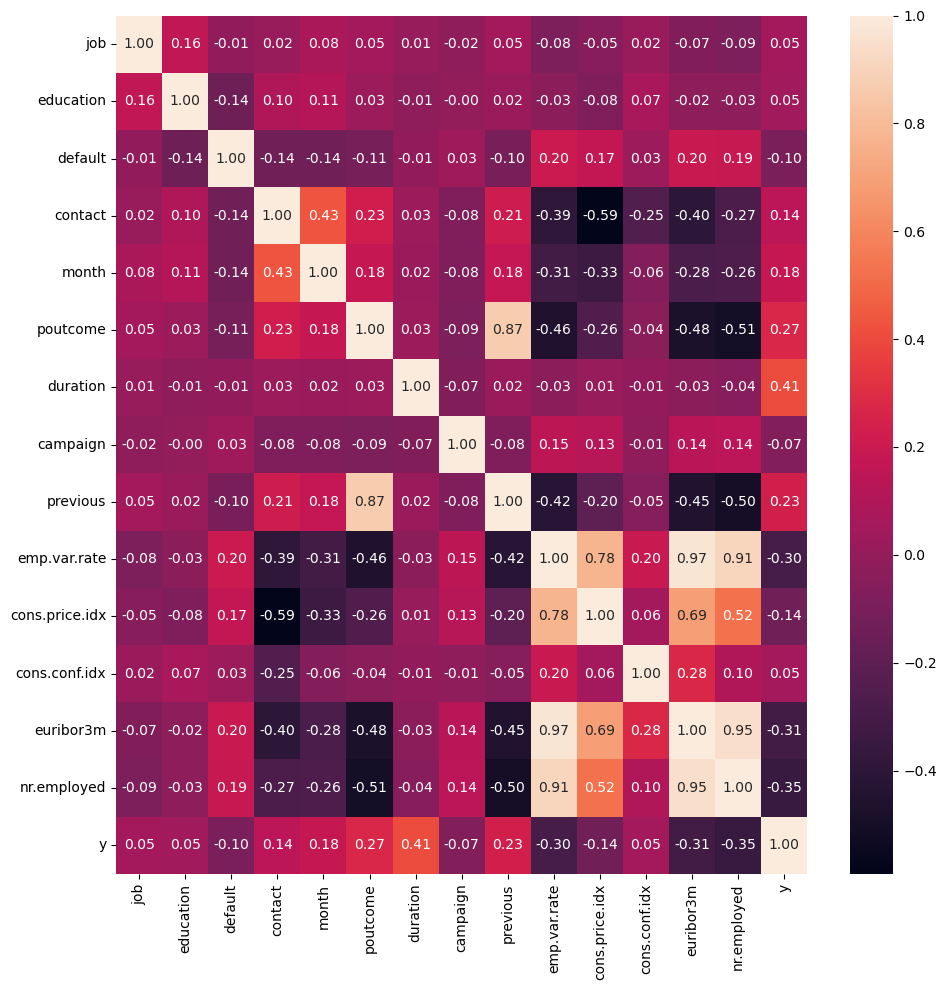

In [19]:
fig, axes = plt.subplots(figsize=(10, 10))


sns.heatmap(filt_df[['job', 'education', 'default',
                      'contact','month', 'poutcome',
                        'duration', 'campaign', 'previous',
                          'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                            'euribor3m', 'nr.employed', 'y']].corr(),
                            annot = True,
                                 fmt = ".2f")

plt.tight_layout()

plt.show()

----------**Conclusions**----------

Duration (`duration`):

- Shows a relatively high positive correlation with the target variable `y` (0.41), indicating that longer call durations are positively associated with the target outcome.

Previous Campaign Outcome (`poutcome`):

- Has a moderate positive correlation with y (0.27), suggesting that previous positive campaign outcomes might increase the likelihood of a successful outcome in the current campaign.

Employment Variation Rate (`emp.var.rate`):

- Highly correlated with euribor3m (0.97) and nr.employed (0.78), indicating that these variables may represent similar economic trends or indicators.

- Shows a negative correlation with y (-0.30), implying that higher employment variation rates may be associated with a lower likelihood of achieving the target outcome.

Consumer Price Index (`cons.price.idx`):

- Shows a positive correlation with emp.var.rate (0.78) and nr.employed (0.52), suggesting these variables track similar economic conditions.

Number of Employees (`nr.employed`):

- Also shows high positive correlations with euribor3m (0.95) and emp.var.rate (0.78). This pattern might indicate that these variables collectively represent an economic context in which employment and interest rates are related.

- Strong negative correlation with y (-0.35), suggesting that a higher number of employees might reduce the likelihood of a positive target outcome.

Other Notable Correlations:

- Consumer Confidence Index (cons.conf.idx) shows a negative correlation with emp.var.rate (-0.42), euribor3m (-0.45), and nr.employed (-0.50), suggesting that consumer confidence may inversely relate to certain economic conditions.

- Contact Count (contact) has a moderate negative correlation with euribor3m (-0.39) and a weaker positive correlation with y (0.14).

------------**General Insight**------------

The heatmap helps highlight relationships between economic indicators, call attributes, and the target variable `y`. It shows that certain economic factors (e.g., `emp.var.rate`, `nr.employed`, `euribor3m`) may indirectly influence the success of the outcome `y`, while call-specific metrics (like `duration`) have a direct impact.

---

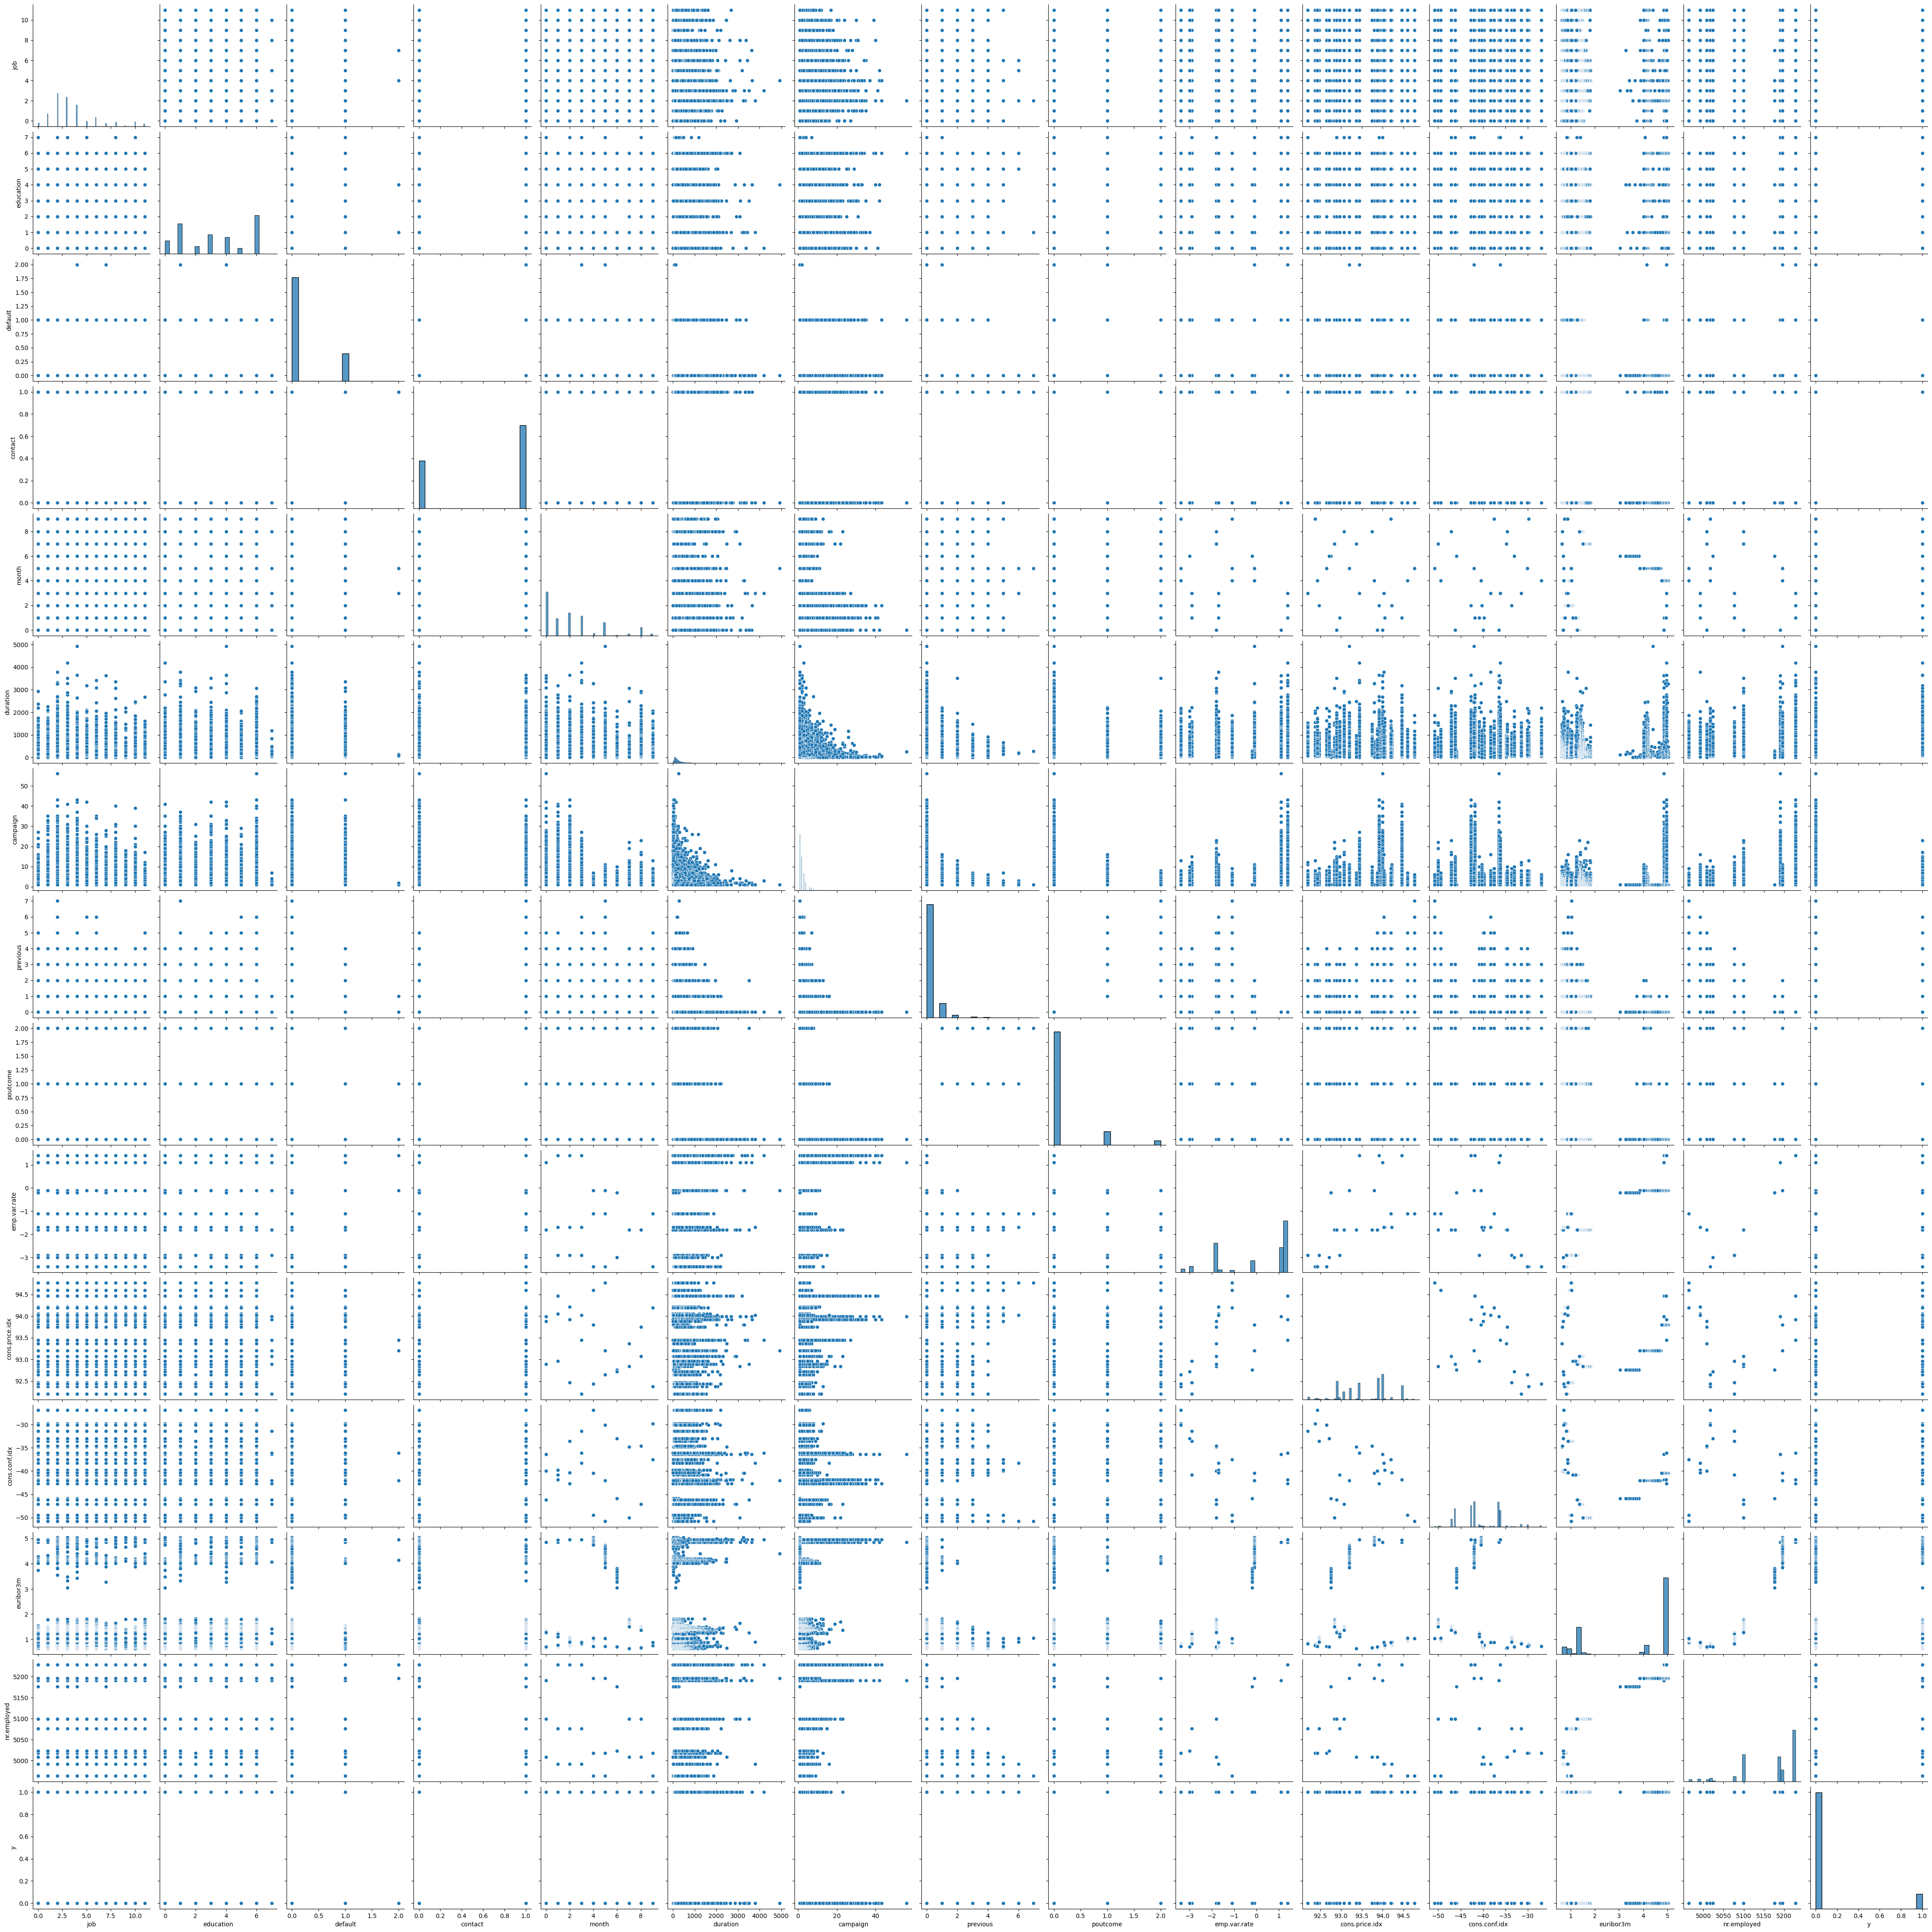

In [20]:
sns.pairplot(filt_df, height=3, diag_kind='hist')

---

## Step 5: Feature engineering

- ### 5.1 Outliers analysis

    **Descriptive analysis** is a powerful tool for characterizing the data set: the mean, variance and quartiles provide powerful information about each variable. The `describe()` function of a DataFrame helps us to calculate in a very short time all these values.

In [21]:
# Eliminate irrelevant columns

filt_df.drop(["job", "education", "default", "campaign"],
                    axis = "columns",
                        inplace = True)

In [22]:
total_stats = filt_df.describe()

total_stats

,contact,month,duration,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.000,41176.000,41176.000,41176.000,41176.000,41176.000,41176.000,41176.000,41176.000,41176.000,41176.000
mean,0.635,2.250,258.316,0.173,0.170,0.082,93.576,-40.503,3.621,5167.035,0.113
std,0.482,2.429,259.305,0.495,0.456,1.571,0.579,4.628,1.734,72.251,0.316
min,0.000,0.000,0.000,0.000,0.000,-3.400,92.201,-50.800,0.634,4963.600,0.000
25%,0.000,0.000,102.000,0.000,0.000,-1.800,93.075,-42.700,1.344,5099.100,0.000
50%,1.000,2.000,180.000,0.000,0.000,1.100,93.749,-41.800,4.857,5191.000,0.000
75%,1.000,3.000,319.000,0.000,0.000,1.400,93.994,-36.400,4.961,5228.100,0.000
max,1.000,9.000,4918.000,7.000,2.000,1.400,94.767,-26.900,5.045,5228.100,1.000


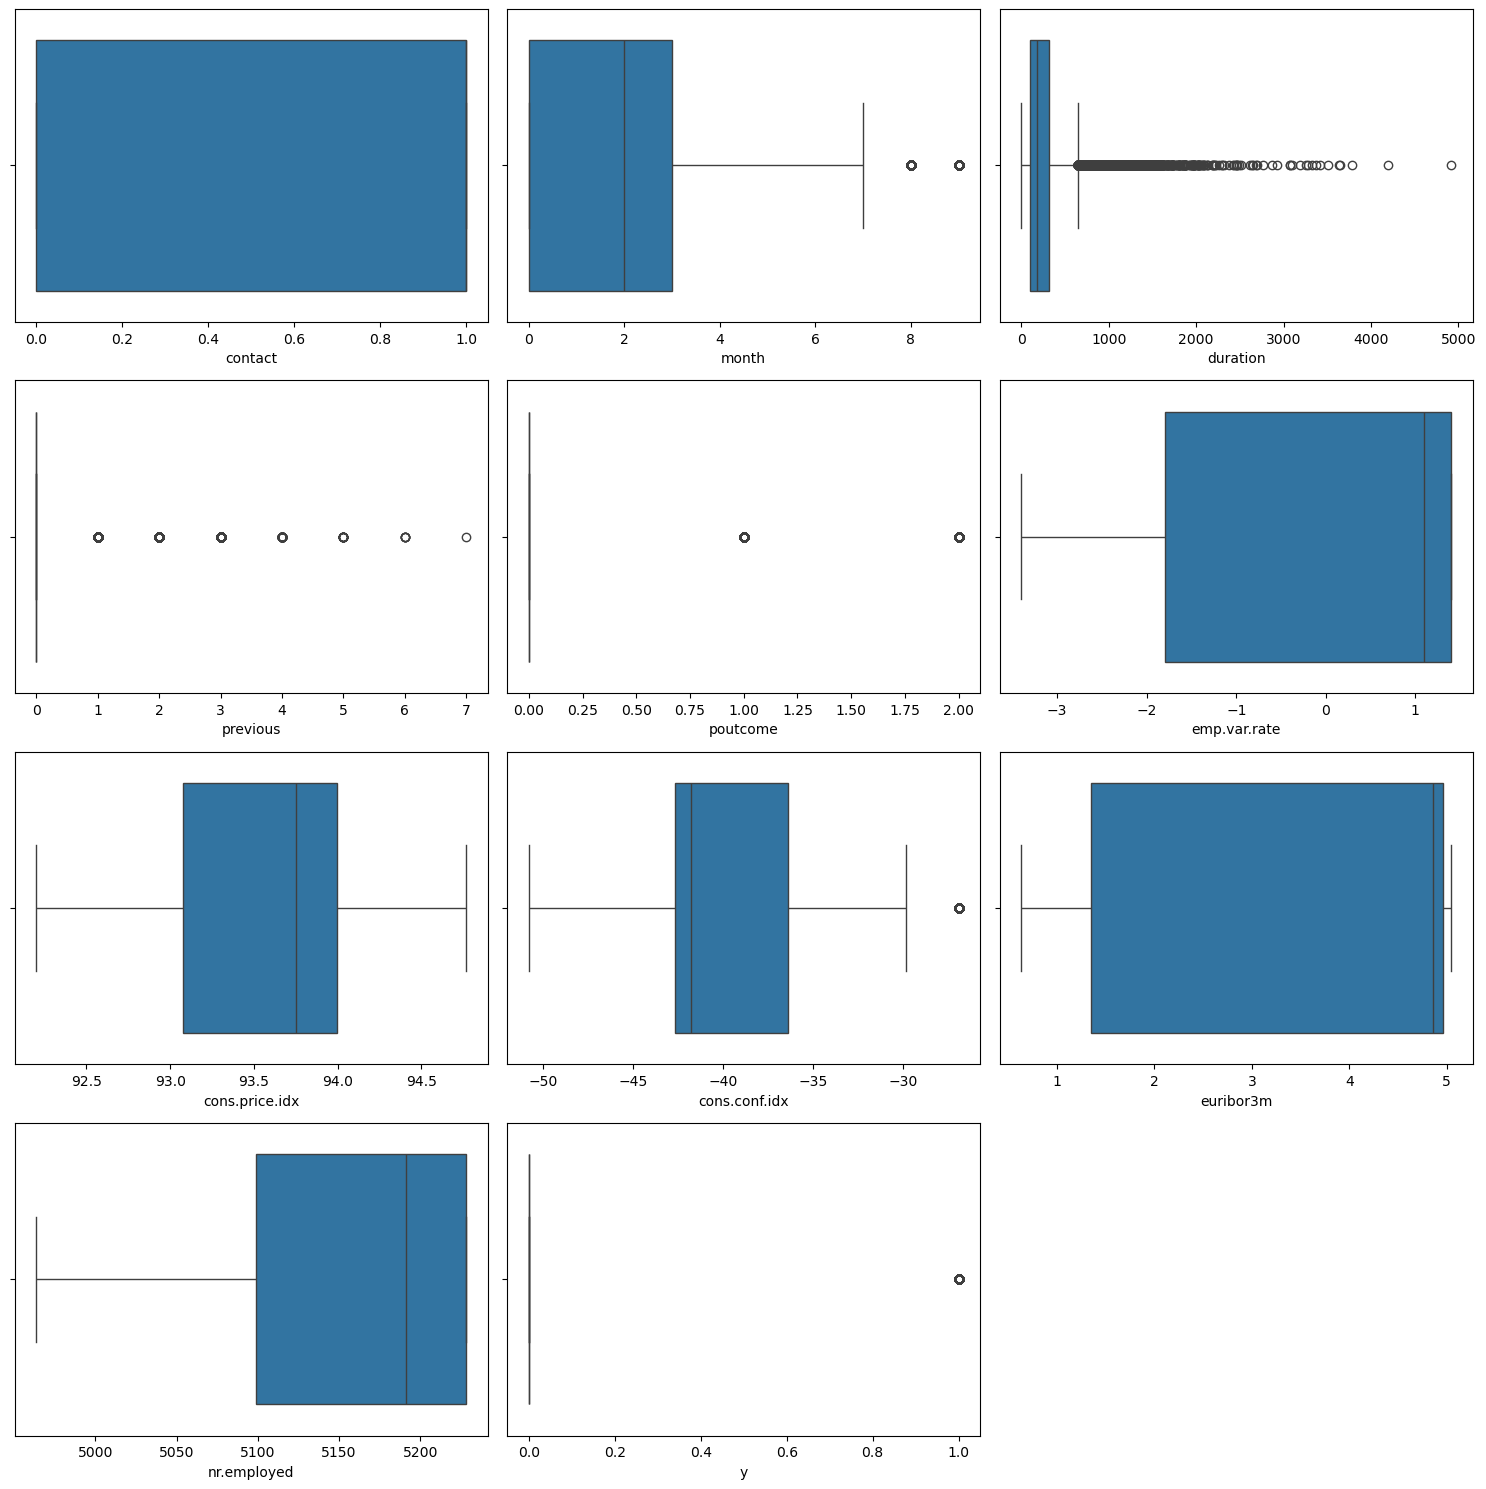

In [50]:
fig, axes = plt.subplots(4, 3, figsize = (15, 15))



sns.boxplot(ax = axes[0, 0],
                data = filt_df,
                    x = "contact")
sns.boxplot(ax = axes[0, 1],
                data = filt_df,
                    x = "month")
sns.boxplot(ax = axes[0, 2],
                data = filt_df,
                    x = "duration")


sns.boxplot(ax = axes[1, 0],
                data = filt_df,
                    x = "previous")
sns.boxplot(ax = axes[1, 1],
                data = filt_df, 
                    x = "poutcome")
sns.boxplot(ax = axes[1, 2],
                data = filt_df, 
                    x = "emp.var.rate")


sns.boxplot(ax = axes[2, 0],
                data = filt_df,
                     x = "cons.price.idx")
sns.boxplot(ax = axes[2, 1],
                data = filt_df, 
                    x = "cons.conf.idx")
sns.boxplot(ax = axes[2, 2],
                data = filt_df,
                     x = "euribor3m")


sns.boxplot(ax = axes[3, 0],
                data = filt_df, 
                    x = "nr.employed")
sns.boxplot(ax = axes[3, 1],
                data = filt_df,
                     x = "y")

# Remove the empty axes
fig.delaxes(ax = axes[3,2])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

- ### 5.2 Upper and lower limits of outliers variables --> JSON saving

In [51]:
# Save Outliers

def def_outliers(total_stats, variable, json_file):

    individual_stats = total_stats[variable] # Save the stats for IQR

    iqr = individual_stats["75%"] - individual_stats["25%"]
    upper_limit = individual_stats["75%"] + (2 * iqr) 
    lower_limit = individual_stats["25%"] - (2 * iqr)

    if (lower_limit < 0): lower_limit = 0

    print(f"\nThe upper_limit of Variable {variable} is {round(upper_limit, 3)}, the lower_limit is {round(lower_limit, 3)} and the IQR is {round(iqr, 3)}")
    print('                      ==========================================                  ')
    with open(json_file, "w") as f:
        json.dump({
            "upper_limit": upper_limit,
            "lower_limit": lower_limit
        }, f)

`If we had lower_limit = 0 ==> there are not outliers below.`

`We only have outliers above, upper_limit.`

In [52]:
# Outliers saved in JSON

def_outliers(total_stats, "month", "../data/interim/outliers_month.json")

def_outliers(total_stats, "duration", "../data/interim/outliers_duration.json")

def_outliers(total_stats, "cons.conf.idx", "../data/interim/outliers_cons.conf.idx.json")


The upper_limit of Variable month is 9.0, the lower_limit is 0 and the IQR is 3.0

The upper_limit of Variable duration is 753.0, the lower_limit is 0 and the IQR is 217.0

The upper_limit of Variable cons.conf.idx is -23.8, the lower_limit is 0 and the IQR is 6.3


- ### 5.3 Copy 2 DataFrames: with and without outliers

In [53]:
df_with_outliers = filt_df.copy()
df_without_outliers = filt_df.copy()

'''Todos los Outliers modificados los guardaremos actualizaremos en df_sin_outliers'''

'Todos los Outliers modificados los guardaremos actualizaremos en df_sin_outliers'

In [54]:
# Open Outliers JSON

def open_outliers(dataset_without_outliers, variable, json_path):

    with open(json_path, "r") as f:
        outliers = json.load(f)

    upper_limit_ = outliers["upper_limit"]

    lower_limit_ = outliers["lower_limit"]

    dataset_without_outliers[variable] = dataset_without_outliers[variable].apply(
        lambda x: upper_limit_ if (x > upper_limit_) else (lower_limit_ if (x < lower_limit_) else x)
        )

In [55]:
# Open Outliers_month and replace the values
open_outliers(df_without_outliers, "month", "../data/interim/outliers_month.json")

# Open Outliers_duration and replace the values
open_outliers(df_without_outliers, "duration", "../data/interim/outliers_duration.json")

# Open Outliers_cons.conf.idx and replace the values
open_outliers(df_without_outliers, "cons.conf.idx", "../data/interim/outliers_cons.conf.idx.json")

- ### 5.4 Missing value analysis

In [56]:
filt_df.isna().sum()

contact           0
month             0
duration          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

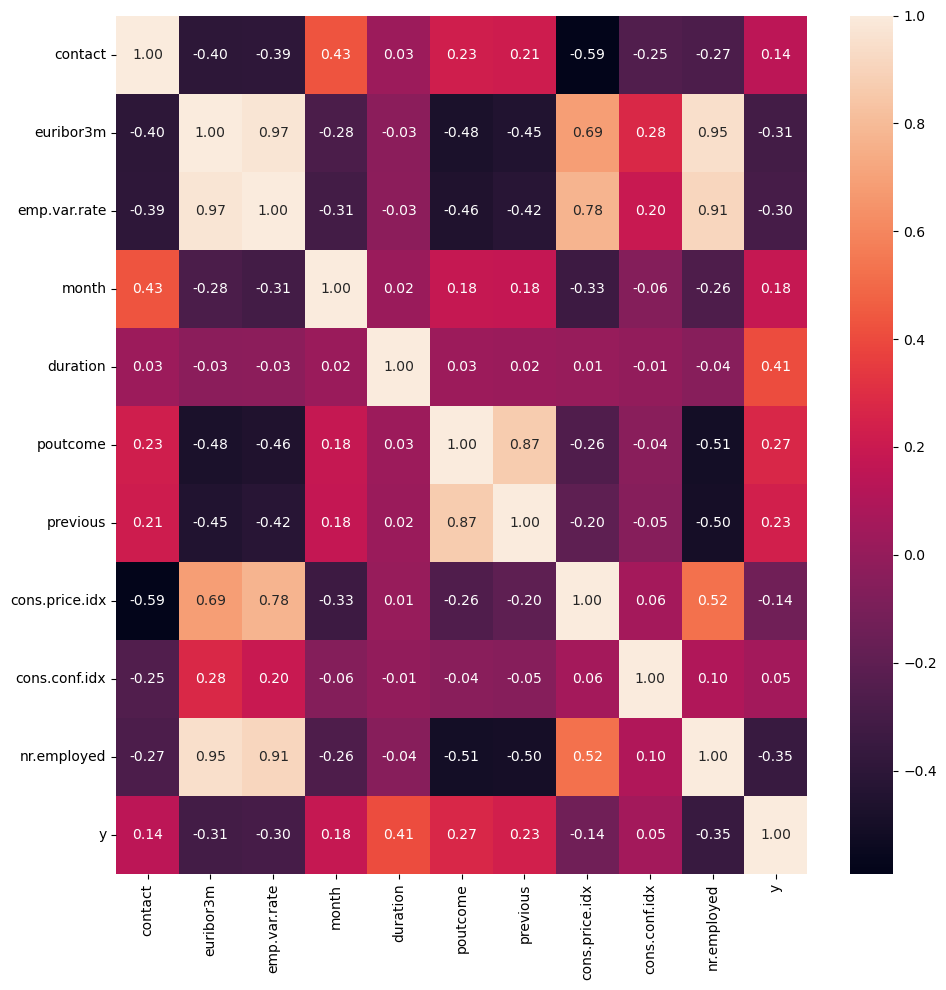

In [57]:
fig, axes = plt.subplots(figsize=(10, 10))


sns.heatmap(filt_df[['contact', 'euribor3m', 'emp.var.rate',
                      'month', 'duration', 'poutcome',
                      'previous', 'cons.price.idx', 'cons.conf.idx',
                        'nr.employed', 'y']].corr(),
                            annot = True,
                                 fmt = ".2f")


plt.tight_layout()


plt.show()

- ### 5.6 Feature Scaling
    - #### 5.6.1 Train test

In [58]:
def train_test(target_var, df, test_size=0.2, random_state=42):
    
    X = df.drop(columns = target_var)
    y = df[target_var]

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                         test_size = test_size,
                                                           random_state = random_state)
    
    return X_train, X_test, y_train, y_test

In [59]:
# With Outliers
X_train_with_outliers, X_test_with_outliers, y_train, y_test = train_test('y', df_with_outliers)

# Without Outliers
X_train_without_outliers, X_test_without_outliers, _, _ = train_test('y', df_without_outliers)

> NOTE: Only predictor variables should be scaled, never the target.

---

- #### 5.6.2 Normalization

In [60]:
def norm(X_train,
          X_test,
            type_df: str): # with OR without outliers

    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, 
                                index = X_train.index,
                                  columns = X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm,
                                index = X_test.index,
                                  columns = X_test.columns)

    dump(scaler, open(f'../data/interim/normalized_{type_df}.sav', 'wb'))

    return X_train_norm, X_test_norm

In [61]:
# With Outliers
X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers,
                                                              X_test_with_outliers,
                                                                'with_outliers')


# Without Outliers
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers,
                                                                    X_test_without_outliers,
                                                                      'without_outliers')

---

- #### 5.6.3 Min-Max Scaling

In [62]:
def minmax(X_train,
            X_test,
              type_df: str): # with OR without outliers

    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax,
                                   index = X_train.index, 
                                    columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax,
                                  index = X_test.index,
                                    columns=X_test.columns)
    
    dump(scaler, open(f'../data/interim/minmax_{type_df}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [63]:
# With Outliers
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers,
                                                                    X_test_with_outliers,
                                                                      'with_outliers')

# Without Outliers
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers,
                                                                          X_test_without_outliers,
                                                                            'without_outliers')

> NOTE: In this step we must make sure that all our variables are numeric, and, if not, as we have seen in the steps at the beginning, we should transform them.

---

## Step 6: Feature selection

In [64]:
def kselection(X_train,
                X_test,
                  y_train,
                    k, # This function selects the 'k' best feat. from our dataset
                      type_df: str): # with OR without outliers

    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)

    cols = selection_model.get_support()

    X_train_sel = pd.DataFrame(selection_model.transform(X_train),
                                columns=X_train.columns.values[cols]) 
    X_test_sel = pd.DataFrame(selection_model.transform(X_test),
                               columns=X_test.columns.values[cols])

    dump(selection_model, open(f'../data/interim/selection_model_{type_df}.sav', 'wb'))

    return X_train_sel, X_test_sel   

In [65]:
# With Outliers
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers,
                                                                  X_test_with_outliers,
                                                                    y_train, 10,
                                                                      'with_outliers')

# Without Outliers
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers,
                                                                        X_test_without_outliers,
                                                                          y_train, 10,
                                                                            'without_outliers')

c:\Users\Fermin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


- ### 6.1 Applying the filter to the normalized and minmax scaled data frames

In [66]:
#=========================normalized========================

# X_train normalized----------------
    # With Outliers
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
    # Without Outliers
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_with_outliers_sel.columns]

# X_test normalized-----------------
    # With Outliers
X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
    # Without Outliers
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

#==========================min-max==========================

# X_train min-max-------------------
    # With Outliers
X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
    # Without Outliers
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

# X_test min-max--------------------
    # With Outliers
X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
    # Without Outliers
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

- ### 6.2 Saving the CSV files

In [67]:
# Train data frames
X_train_with_outliers_sel.to_csv('../data/processed/X_train_with_outliers_sel.csv', index=False)
X_train_without_outliers_sel.to_csv('../data/processed/X_train_without_outliers_sel.csv', index=False)
X_train_with_outliers_norm_sel.to_csv('../data/processed/X_train_with_outliers_norm_sel.csv', index=False)
X_train_without_outliers_norm_sel.to_csv('../data/processed/X_train_without_outliers_norm_sel.csv', index=False)
X_train_with_outliers_minmax_sel.to_csv('../data/processed/X_train_with_outliers_minmax_sel.csv', index=False)
X_train_without_outliers_minmax_sel.to_csv('../data/processed/X_train_without_outliers_minmax_sel.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)

# Test data frames
X_test_with_outliers_sel.to_csv('../data/processed/X_test_with_outliers_sel.csv', index=False)
X_test_without_outliers_sel.to_csv('../data/processed/X_test_without_outliers_sel.csv', index=False)
X_test_with_outliers_norm_sel.to_csv('../data/processed/X_test_with_outliers_norm_sel.csv', index=False)
X_test_without_outliers_norm_sel.to_csv('../data/processed/X_test_without_outliers_norm_sel.csv', index=False)
X_test_with_outliers_minmax_sel.to_csv('../data/processed/X_test_with_outliers_minmax_sel.csv', index=False)
X_test_without_outliers_minmax_sel.to_csv('../data/processed/X_test_without_outliers_minmax_sel.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)